In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:

file_id = "1gQZyNG-KJiyMhoz6CjLknmt62WG8umBA"
download_url = f"https://drive.google.com/uc?id={file_id}"

import pandas as pd

data = pd.read_csv(download_url)
print(data.head())
print(data.info())


           Datetime  AEP_MW
0  31-12-2004 01:00   13478
1  31-12-2004 02:00   12865
2  31-12-2004 03:00   12577
3  31-12-2004 04:00   12517
4  31-12-2004 05:00   12670
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Datetime  121273 non-null  object
 1   AEP_MW    121273 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB
None


In [5]:
data['Datetime'] = pd.to_datetime(data['Datetime'])


/tmp/ipython-input-1853199223.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Datetime'] = pd.to_datetime(data['Datetime'])


In [6]:
data = data.sort_values(by='Datetime')

In [7]:
print(data.isnull().sum())

Datetime    0
AEP_MW      0
dtype: int64


In [9]:
print(data.columns)



Index(['Datetime', 'AEP_MW'], dtype='object')


In [10]:
data.rename(columns={'AEP_MW': 'MW'}, inplace=True)

In [11]:
data = data.drop_duplicates()

In [12]:
data.reset_index(drop=True, inplace=True)

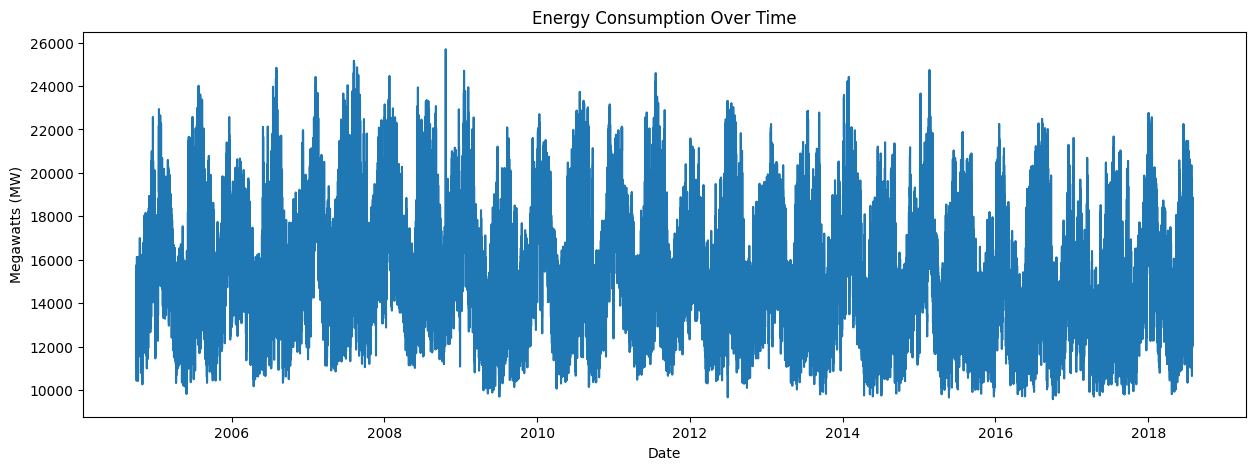

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(data['Datetime'], data['MW'])
plt.title('Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Megawatts (MW)')
plt.show()

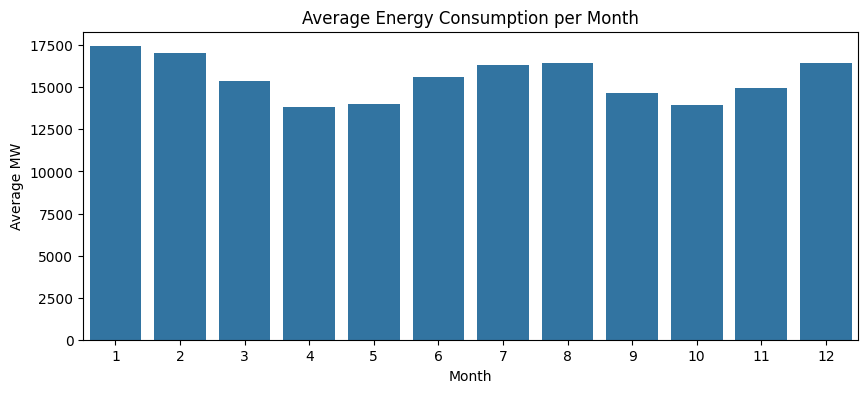

In [17]:
import seaborn as sns
data['Month'] = data['Datetime'].dt.month
data['Year'] = data['Datetime'].dt.year
data['Hour'] = data['Datetime'].dt.hour
data['DayOfWeek'] = data['Datetime'].dt.dayofweek

monthly_avg = data.groupby('Month')['MW'].mean()

plt.figure(figsize=(10,4))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title('Average Energy Consumption per Month')
plt.xlabel('Month')
plt.ylabel('Average MW')
plt.show()


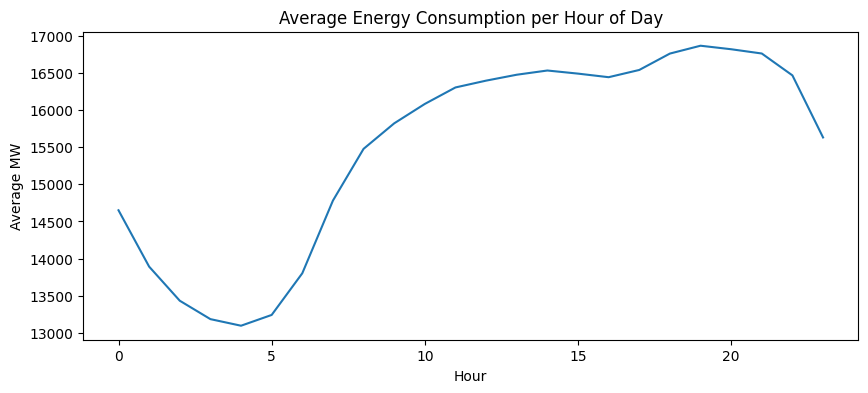

In [18]:
hourly_avg = data.groupby('Hour')['MW'].mean()
plt.figure(figsize=(10,4))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values)
plt.title('Average Energy Consumption per Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average MW')
plt.show()
